In [197]:
#load csv
import csv
import os
import sys
import re
import json
import pandas as pd
import numpy as np

#read csv file with path:
csv_filepath = r"C:\Users\samut\OneDrive\Desktop\DATATHON 2024\skylab_instagram_datathon_dataset.csv"
df_real = pd.read_csv(csv_filepath, sep=';')
#make the period_end_date column a datetime object
df_real['period_end_date'] = pd.to_datetime(df_real['period_end_date'])
#drop calculation_type column
df_real.drop(columns=['calculation_type'], inplace=True)
#drop period column
df_real.drop(columns=['period'], inplace=True)
#drop all values named All Brand from business entity doing_business as name
df_real = df_real[df_real['business_entity_doing_business_as_name'] != 'All Brands']


 
grouping_columns = [col for col in df_real.columns if col != 'compset']

df_real.fillna('Group_Null', inplace=True)
df_real = df_real.groupby(grouping_columns).agg({'compset': lambda x: set(x)}).reset_index()
df_real.replace('Group_Null', pd.NA, inplace=True)

df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('china;hong kong', 'hong kong')

# remove the sign ";" in column domicile_country_name
df_real['domicile_country_name'] = df_real['domicile_country_name'].str.replace(';', '')

# if empty, fill with nan
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('', np.nan)

df_real




C:\Users\samut\AppData\Local\Temp\ipykernel_9596\2892129317.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Group_Null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_real.fillna('Group_Null', inplace=True)


,period_end_date,compset_group,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes,compset
0,2015-01-03,Apparel Retail,Abercrombie & Fitch,Abercrombie & Fitch,United States of America,Abercrombie & Fitch,New York Stock Exchange,1669930.0,5.0,1.0,908.0,43976.0,"{Apparel Retail, US Softlines Analyst Interest..."
1,2015-01-03,Apparel Retail,Aerie,American Eagle,United States of America,American Eagle,New York Stock Exchange,<NA>,128.0,<NA>,4715.0,460095.0,"{Apparel Retail, US Softlines Analyst Interest..."
2,2015-01-03,Apparel Retail,Aeropostale,Aeropostale,<NA>,ARO Liquidation Inc,<NA>,2318630.0,13.0,<NA>,7009.0,1328515.0,"{Ecommerce Mainstream Apparel Retail, US Softl..."
3,2015-01-03,Apparel Retail,Aldo,Aldo Group Inc/The,<NA>,Aldo Group Inc/The,<NA>,<NA>,89.0,1.0,1919.0,88904.0,"{Apparel Retail, Omnichannel Apparel Retail}"
4,2015-01-03,Apparel Retail,Alexandre Birman,Arezzo Industria e Comercio SA,Brazil,Arezzo Industria e Comercio SA,Bolsa de Valores de Sao Paulo (XBSP),<NA>,3.0,<NA>,109.0,2549.0,"{Apparel Retail, Omnichannel Apparel Retail}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298035,2023-09-16,Toys & Collectibles,Miniso,MINISO Group Holding Ltd,Hong Kong,MINISO Group Holding Ltd,Hong Kong Exchange,8291470.0,894.0,466.0,20177.0,1117490.0,{Toys & Collectibles}
298036,2023-09-16,Toys & Collectibles,Pop Mart,Pop Mart International Group Ltd,Hong Kong,Pop Mart International Group Ltd,Hong Kong Exchange,423704.0,248.0,77.0,1941.0,171832.0,{Toys & Collectibles}
298037,2023-09-16,Toys & Collectibles,Rolife,"Robotime Technology (Suzhou) Co., Ltd.",<NA>,"Robotime Technology (Suzhou) Co., Ltd.",<NA>,121511.0,23.0,13.0,234.0,19833.0,{Toys & Collectibles}
298038,2023-09-16,Toys & Collectibles,Sanrio,Sanrio Co Ltd,Japan,Sanrio Co Ltd,Tokyo Stock Exchange,2492199.0,47.0,5.0,15341.0,1893434.0,{Toys & Collectibles}


In [169]:
# how meany unique companys are in each unique compset value
compset = df_real['compset'].unique()
compset_dict = {}
for comp in compset:
    compset_dict[comp] = df_real[df_real['compset'] == comp]['business_entity_doing_business_as_name'].nunique()
print(compset_dict)




{'Soft Luxury': 43, 'Luxury & Premium & Mainstream': 146, 'US Softlines Analyst Interest List': 253, 'Global Luxury Analysts Interest List': 66, 'Coffee': 5, 'Restaurants': 40, 'Beverages': 50, 'Sports drinks': 4, 'Energy drinks': 6, 'Fast Fashion': 44, 'Omnichannel Apparel Retail': 57, 'Apparel Retail': 164, 'US Department Store': 11, 'Latam Apparel Retail': 8, 'Food Products': 48, 'Snack Bars': 9, 'Pasta Sauce': 6, 'Ecommerce Apparel Retail': 47, 'Ecommerce Mainstream Apparel Retail': 22, 'Sporting Goods': 7, 'Casual Dining': 15, 'Hard Luxury': 34, 'Sportswear & Athleisure': 47, 'Athleisure': 16, 'Footwear': 25, 'Beauty & Boutique': 104, 'Building Products': 11, 'Sportswear': 28, 'Petcare': 11, 'Premium Brands': 27, 'QSR': 16, 'Alcohol': 35, 'Toys & Collectibles': 9, 'Mattress': 12, 'Fitness & Exercise': 21, 'US Discount Store': 11, 'Ecommerce Luxury Apparel Retail': 13, 'Plant-Based Meat': 19, 'Food Retail': 6, 'Discount Retailers ': 6, 'Mid-Range Watch & Jewelry': 20, 'Outdoor Gear

In [135]:
import pandas as pd

# Assuming your data is stored in a CSV file named 'sample_data.csv'
data = df

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


# Correlation matrix
#remove the period column
data = data.drop(columns=['period'])
#covert period_end_date to datetime
data['period_end_date'] = pd.to_datetime(data['period_end_date'])
print("\nCorrelation matrix:")
#drop all coulms besides the ['followers', 'pictures', 'videos', 'comments', 'likes'] cloums

data = data[['followers', 'pictures', 'videos', 'comments', 'likes']]

print(data.corr())

data.columns



Summary statistics:
                  period_end_date     followers       pictures        videos  \
count                       40000  3.287500e+04   39518.000000  38870.000000   
mean   2019-07-05 19:14:29.040000  1.255443e+07     326.892378     58.749961   
min           2015-01-03 00:00:00  0.000000e+00       0.000000      0.000000   
25%           2017-06-08 06:00:00  3.001175e+05      19.000000      2.000000   
50%           2019-07-27 00:00:00  1.077540e+06      44.000000      7.000000   
75%           2021-08-14 00:00:00  4.340802e+06     121.000000     20.000000   
max           2023-09-16 00:00:00  3.499035e+09  129684.000000  35120.000000   
std                           NaN  1.056150e+08    2715.478851    568.116443   

           comments         likes  
count  3.949400e+04  3.953000e+04  
mean   2.898429e+04  2.049349e+06  
min    0.000000e+00  0.000000e+00  
25%    3.710000e+02  1.738600e+04  
50%    1.446000e+03  9.284050e+04  
75%    5.876500e+03  4.509885e+05  
max   

Index(['followers', 'pictures', 'videos', 'comments', 'likes'], dtype='object')

In [136]:
df_real_wo_all = df_real[df_real['business_entity_doing_business_as_name'] != 'All Brands']


In [137]:
grouped_df = df_real_wo_all.groupby('compset_group')
max_likes_companies = grouped_df.apply(lambda x: x.loc[x['likes'].idxmax()])
max_likes_companies

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
compset_group,,,,,,,,,,,,,,,
Apparel Retail,Weekly,2016-12-17,Apparel Retail,US Softlines Analyst Interest List,Victoria's Secret,Victoria's Secret & Co,United States of America,Victoria's Secret & Co,New York Stock Exchange,Metric Value,57963765.0,314.0,86.0,253923.0,71526696.0
Beauty & Boutique,Weekly,2016-11-26,Beauty & Boutique,Beauty & Boutique,Kylie Cosmetics,Coty,United States of America,Agnaten SE,New York Stock Exchange,Metric Value,9935785.0,150.0,11.0,321178.0,36044217.0
Beverages,Weekly,2017-04-15,Beverages,Energy drinks,Red Bull,Red Bull,NaN,Red Bull,NaN,Metric Value,NaN,1401.0,603.0,89711.0,20223635.0
Building Products,Weekly,2022-10-01,Building Products,Building Products,GAF,Standard Industries Inc,NaN,G Holdings Inc,NaN,Metric Value,28603.0,9.0,8.0,668.0,120835.0
Dermatology and Orthodontics,Weekly,2019-05-18,Dermatology and Orthodontics,Dermatology and Orthodontics,Botox,Allergan,NaN,AbbVie,NaN,Metric Value,673386.0,21.0,15.0,0.0,698679.0
Discount Retailers,Weekly,2019-11-23,Discount Retailers,Discount Retailers,Target,Target,United States of America,Target,New York Stock Exchange,Metric Value,6420684.0,44.0,6.0,15422.0,960012.0
Entertainment,Weekly,2022-05-07,Entertainment,Entertainment,MARVEL,Aga Marvel,NaN,Aga Marvel,NaN,Metric Value,111344909.0,477.0,417.0,300988.0,120689724.0
Fitness & Exercise,Weekly,2022-01-01,Fitness & Exercise,Fitness & Exercise,Peloton,Peloton,United States of America,Peloton,NASDAQ Global Select,Metric Value,1760388.0,48.0,17.0,61990.0,1326231.0
Food Products,Weekly,2019-08-31,Food Products,Plant-Based Meat,Beyond Meat,Beyond Meat,United States of America,Beyond Meat,NASDAQ Global Select,Metric Value,777795.0,10.0,5.0,31307.0,440512.0


In [138]:
unique_companies = df_real_wo_all.groupby('compset_group')['business_entity_doing_business_as_name'].nunique()
print(unique_companies)
df_real_wo_all['compset_group'].value_counts()


compset_group
Apparel Retail                   163
Beauty & Boutique                103
Beverages                         49
Building Products                 10
Dermatology and Orthodontics      11
Discount Retailers                 5
Entertainment                      3
Fitness & Exercise                20
Food Products                     47
Food Retail                        5
Home Appliances                    7
Luxury & Premium & Mainstream    145
Mattress                          11
Outdoor Gear                      17
Petcare                           10
Restaurants                       39
Sporting Goods                     6
Sportswear & Athleisure           46
Toys & Collectibles                8
Name: business_entity_doing_business_as_name, dtype: int64


compset_group
Luxury & Premium & Mainstream    212146
Apparel Retail                   203658
Sportswear & Athleisure           54338
Beauty & Boutique                 43811
Food Products                     39882
Beverages                         39196
Restaurants                       35324
Outdoor Gear                       8626
Fitness & Exercise                 8523
Dermatology and Orthodontics       6454
Mattress                           4652
Petcare                            4441
Building Products                  3921
Sporting Goods                     2730
Home Appliances                    2558
Food Retail                        2119
Toys & Collectibles                1774
Discount Retailers                 1645
Entertainment                       760
Name: count, dtype: int64

In [139]:
#do any compnays have multiple compeset croups they are apart of? we need too exclue the dates because they are not unique
multiple_compeset_croups =df_real_wo_all.groupby('business_entity_doing_business_as_name')['compset_group'].nunique().sort_values(ascending=False)
#is there any value in this list greater than one?
multiple_compeset_croups[multiple_compeset_croups > 1].count()


#for the same date does any compay have two diffrent follower counts
multiple_follower_counts = df_real_wo_all.groupby(['business_entity_doing_business_as_name', 'period_end_date'])['followers'].nunique().sort_values(ascending=False)
multiple_follower_counts[multiple_follower_counts > 1].count()


0

<Axes: title={'center': 'Follower count on companies min date'}, ylabel='Frequency'>

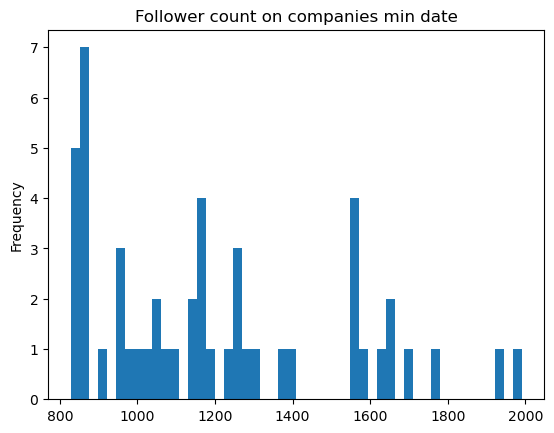

In [140]:


#find the min date for each company and have count of followers
min_date_followers = df_real_wo_all.groupby('business_entity_doing_business_as_name').agg({'period_end_date': 'min', 'followers': 'count'})
#min date in the dataset



#get rid of any company thats min_date_follwers date is larger than'2015-01-03'
min_date_followers_after = min_date_followers[min_date_followers['period_end_date'] > min_date_followers['period_end_date'].min()]
m=min_date_followers_after.nlargest(50, 'followers')
m['followers'].plot(kind='hist', bins=50, title='Follower count on companies min date')

#for each company in m find the companys followers count each week for the first 4 weeks




i wanna know what each companys follower number was when they joined the data set. so find each comapys first entry in the data set and give me the follower count at that time

for each comapany whats each compnys average follower increase per week for the next 10 weeks after its start date in df_real_wo_all  

for each company in m find the companys followers count each week for the first 4 weeks

In [ ]:
i wanna see if the follower counts of the compnays in m will spike after their first entry. calculate the change in followers from the frst week to the 2nd week then compare it to the avrage change in follower count for a while after the 3rd week. use the df_real_wo_all to find the incress in followers for the question.

In [155]:
import pandas as pd

# Filter the DataFrame to include only the rows where the period is "Weekly"
df_filtered = df_real_wo_all[df_real_wo_all['period'] == 'Weekly']

# Sort the DataFrame by the "period_end_date" column in ascending order
df_sorted = df_filtered.sort_values('period_end_date')
df_sorted

# Group the DataFrame by the "business_entity_doing_business_as_name" column
#grouped_df = df_sorted.groupby('business_entity_doing_business_as_name')

# Calculate the change in followers from the first week to the second week
#df_sorted['follower_change'] = grouped_df['followers'].diff()

# Calculate the average change in follower count for a while after the third week
#df_sorted['average_follower_change'] = grouped_df['follower_change'].rolling(window=3, min_periods=1).mean().shift(-2)

# Compare the change in followers from the first week to the second week with the average change in follower count for a while after the third week
#df_sorted['follower_spike'] = df_sorted['follower_change'] > df_sorted['average_follower_change']

# Print the resulting DataFrame
#print(df_sorted[['business_entity_doing_business_as_name', 'period_end_date', 'follower_change', 'average_follower_change', 'follower_spike']])


,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
191562,Weekly,2015-01-03,Luxury & Premium & Mainstream,Premium Brands,Kenzo,LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris,Metric Value,822993.0,NaN,NaN,NaN,NaN
62227,Weekly,2015-01-03,Beverages,Beverages,BodyArmor,BA Sports Nutrition LLC,NaN,Coca-Cola,NaN,Metric Value,NaN,17.0,NaN,218.0,14012.0
584642,Weekly,2015-01-03,Sportswear & Athleisure,US Softlines Analyst Interest List,Fabletics,Forever 21,NaN,Forever 21,NaN,Metric Value,NaN,37.0,5.0,1420.0,49435.0
96161,Weekly,2015-01-03,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Armani,Armani,NaN,Armani,NaN,Metric Value,1801945.0,57.0,2.0,4669.0,549847.0
258788,Weekly,2015-01-03,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Balmain,Balmain SA,NaN,Balmain SA,NaN,Metric Value,1134343.0,75.0,NaN,11744.0,1061520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641074,Weekly,2023-09-16,Home Appliances,Home Appliances,iRobot,iRobot Corp,United States of America,iRobot Corp,NASDAQ - All Markets,Metric Value,308260.0,98.0,96.0,1797.0,2905.0
625011,Weekly,2023-09-16,Sportswear & Athleisure,US Softlines Analyst Interest List,Vans,VF Corporation,United States of America,VF Corporation,New York Stock Exchange,Metric Value,33514333.0,325.0,126.0,8684.0,1193629.0
323843,Weekly,2023-09-16,Apparel Retail,Apparel Retail,YOOX,Richemont,Switzerland,Richemont,Six Swiss Exchange,Metric Value,751610.0,18.0,9.0,270.0,3692.0
131981,Weekly,2023-09-16,Apparel Retail,Omnichannel Apparel Retail,Primark,Primark,NaN,Garfield Weston Foundation,NaN,Metric Value,13485863.0,99.0,79.0,13833.0,1075701.0


In [185]:
# what is the last date in the dataset
print(df_real_wo_all['period_end_date'].max())

2023-09-16 00:00:00


In [209]:
csv_filepath= r"C:\Users\samut\OneDrive\Desktop\DATATHON 2024\API_SI.POV.GINI_DS2_en_csv_v2_213326.csv"
df_Gini = pd.read_csv(csv_filepath, skiprows=4) 
df_Gini.head()

#find the unique country vaues in the read data set in domicile_country_name
#drop nan values
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('United States of America', 'United States')
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('Hong Kong', 'Hong Kong SAR, China')
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('ChinaHong Kong', 'Hong Kong SAR, China')
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')


df_real.dropna(subset=['domicile_country_name'], inplace=True)

#reduce the size of the data set df_Gini to only the countrys in the df_real data set
df_Gini = df_Gini[df_Gini['Country Name'].isin(df_real['domicile_country_name'].unique())]

#if a country has all nan value in 2014-2023 column drop the row
df_Gini.dropna(subset=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], how='all', inplace=True)
df_Gini




,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
13,Australia,AUS,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33.7,NaN,34.3,NaN,NaN,NaN,NaN,NaN,NaN
17,Belgium,BEL,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,27.7,27.6,27.4,27.2,27.2,26.0,26.6,NaN,NaN,NaN
29,Brazil,BRA,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,51.9,53.4,53.3,53.9,53.5,48.9,52.9,52.0,NaN,NaN
35,Canada,CAN,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,33.7,32.7,33.3,32.5,31.7,NaN,NaN,NaN,NaN,NaN
37,Switzerland,CHE,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,32.3,33.0,32.7,33.1,34.0,33.7,NaN,NaN,NaN,NaN
40,China,CHN,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,38.6,38.5,39.1,38.5,38.2,37.1,NaN,NaN,NaN,NaN
55,Germany,DEU,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,31.4,31.4,31.9,31.8,31.7,NaN,NaN,NaN,NaN,NaN
58,Denmark,DNK,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,28.2,28.2,28.7,28.2,27.7,27.5,28.3,NaN,NaN,NaN
70,Spain,ESP,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,36.2,35.8,34.7,34.7,34.3,34.9,33.9,NaN,NaN,NaN
77,France,FRA,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,32.7,31.9,31.6,32.4,31.2,30.7,31.5,NaN,NaN,NaN
